In [9]:
import numpy as np
import pandas as pd
import os
import featexp
from tqdm import tqdm
import random
pd.set_option('max.columns',100)

In [3]:
train_data = pd.read_csv(r'train_data.csv',encoding='gbk')
test_data = pd.read_csv(r'test_data.csv',encoding='gbk')

In [10]:
train_data.drop('opscope',axis=1).head()

,id,oplocdistrict,industryphy,industryco,dom,enttype,enttypeitem,state,orgid,jobid,adbusign,townsign,regtype,empnum,compform,parnum,exenum,opform,venind,enttypeminu,oploc,regcap,reccap,forregcap,congro,enttypegb,district_FLAG1,district_FLAG2,district_FLAG3,person_SUM,person_NULL_SUM,opfrom_TONOW,opfrom_TIME,opscope_COUNT,label,legal_judgment_num,brand_num,patent_num,other_SUM,other_NULL_SUM,public_date_COUNT,public_MAX,public_MIN,public_MEAN,news_COUNT1,news_COUNT2,news_COUNT3,PREV_TAX_CATEGORIES_COUNT,PREV_TAX_ITEMS_COUNT,PREV_TAXATION_BASIS_COUNT,PREV_TAX_AMOUNT_MAX,PREV_TAX_AMOUNT_MIN,PREV_TAX_AMOUNT_MEAN,PREV_ANCHEYEAR_MAX,PREV_STATE_MAX,PREV_FUNDAM_MAX,PREV_EMPNUM_MAX,PREV_UNEEMPLNUM_MAX,PREV_UNEEMPLNUM_SUM,changeinfo_bgxmdm_COUNT,changeinfo_bgxmdm_NUNIQUE,changeinfo_bgq_NUNIQUE,changeinfo_bgh_NUNIQUE,changeinfo_bgrq_NUNIQUE
0,47645761dc56bb8c5fae00114b768b5d9b6e917c3aec07c4,340223,0,7513.0,0,1100,1150.0,6,340223010010000000,340200000000115392,0,0,1,5.0,NaN,NaN,NaN,-1,NaN,1151.0,0,50.0,NaN,NaN,NaN,1151,1,0,0,5.0,2,509,NaN,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59b38c56de3836838082cfcb1a298951abfe15e6940c49ba,340202,2,9053.0,2,1100,1150.0,6,340202010010000000,400000000000753910,0,0,1,2.0,NaN,1.0,NaN,-1,NaN,1151.0,0,100.0,NaN,NaN,NaN,1151,1,0,0,3.0,1,78,NaN,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e9f7b28ec10e047000d16ab79e1b5e6da434a1697cce7818,340221,3,7212.0,3,4500,4540.0,6,340221010010000000,400000000000013538,0,1,1,2.0,NaN,NaN,NaN,1,NaN,NaN,0,10.0,NaN,NaN,NaN,4540,1,0,0,2.0,2,1889,NaN,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,2.0,2.0,1.0
3,f000950527a6feb63ee1ce82bb22ddd1ab8b8fdffa3b91fb,340202,2,8810.0,4,1100,1130.0,7,340200000000000000,400000000000283237,0,0,1,NaN,NaN,NaN,NaN,-1,NaN,NaN,0,100.0,NaN,NaN,NaN,1130,0,0,0,0.0,3,1096,18261.0,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,2.0,NaN,4.0,0.0,0.0,3.0,3.0,3.0,3.0,2.0
4,9c7fa510616a6830b878f3c8c4317d93e1b022e7f22ae231,340222,1,8052.0,6,9600,NaN,6,340222080010000000,340200000000101006,0,1,1,5.0,1.0,NaN,NaN,0,3.0,NaN,3,20.0,NaN,NaN,NaN,9600,1,0,0,5.0,2,120,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
def round_2(number):
    
    return [round(_,4) for _ in number]
def corr(col_name,bins=20,print_values=False):
    name = []
    value = []
    df=featexp.get_grouped_data(train_data,target_col='label',feature=col_name,bins=bins)[1]
    if 'Nulls' in df[col_name].values.tolist():
        for item in  df[col_name].values.tolist():
            if item=='Nulls':
                value.append(test_data[test_data[col_name].isna()]['id'].count())
                name.append(item)
            else:
                if '[' in item:
                    lst = [float(i) for i in item.replace('[','').replace(']','').replace('(','').split(',')]
                    value.append(test_data[(test_data[col_name]>=lst[0])&(test_data[col_name]<=lst[1])]['id'].count())
                    name.append(item)
                else:
                    lst = [float(i) for i in item.replace('[','').replace(']','').replace('(','').split(',')]
                    value.append(test_data[(test_data[col_name]>lst[0])&(test_data[col_name]<=lst[1])]['id'].count())
                    name.append(item)
    else:
        for item in  df[col_name].values.tolist():
            if '[' in item:
                lst = [float(i) for i in item.replace('[','').replace(']','').replace('(','').split(',')]
                value.append(test_data[(test_data[col_name]>=lst[0])&(test_data[col_name]<=lst[1])]['id'].count())
                name.append(item)
            else:
                lst = [float(i) for i in item.replace('[','').replace(']','').replace('(','').split(',')]
                value.append(test_data[(test_data[col_name]>lst[0])&(test_data[col_name]<=lst[1])]['id'].count())
                name.append(item)
#     if sum(value)!=10000:
#         print('wrong_oooo',sum(value),col_name)
    value = [_/10000 for _ in value]
    train_value=(df['Samples_in_bin']/df['Samples_in_bin'].sum()).tolist()
    std=0
    for i,j in zip(*[train_value,value]):
        std+=(i-j)**2
    df['Samples_in_bin']
    if print_values:
        print(std/len(value))
        print('train:',round_2(train_value))
        print('label:',df.label_mean.tolist())
        print('test:',value)
    return std/len(value),df,round_2(train_value),value,name

In [33]:
def fuzhi(test_data,lst,val,tmp_list):
    for i in lst:
        tmp_list[i] = val
    return tmp_list
def change(test_data,col_name,bins):
    name = []
    value = []
    tmp_list = ['_'] * (test_data.shape[0])
    df=featexp.get_grouped_data(train_data,target_col='label',feature=col_name,bins=bins)[1]
    if 'Nulls' in df[col_name].values.tolist():
        for item in  df[col_name].values.tolist():
            if item=='Nulls':
#                 test_data[test_data[col_name].isna()]['new_bin_'+col_name]=df[df[col_name]==item].index
                tmp_list=fuzhi(test_data,test_data[test_data[col_name].isna()].index.tolist(),df[df[col_name]==item].index.tolist()[0],tmp_list)
            else:
                if '[' in item:
                    lst = [float(i) for i in item.replace('[','').replace(']','').replace('(','').split(',')]
#                     test_data[(test_data[col_name]>=lst[0])&(test_data[col_name]<=lst[1])]['new_bin_'+col_name]=df[df[col_name]==item].index
                    tmp_list=fuzhi(test_data,test_data[(test_data[col_name]>=lst[0])&(test_data[col_name]<=lst[1])].index.tolist(),df[df[col_name]==item].index.tolist()[0],tmp_list)
                else:
                    lst = [float(i) for i in item.replace('[','').replace(']','').replace('(','').split(',')]
#                     test_data[(test_data[col_name]>lst[0])&(test_data[col_name]<=lst[1])]['new_bin_'+col_name]=df[df[col_name]==item].index
                    tmp_list=fuzhi(test_data,test_data[(test_data[col_name]>lst[0])&(test_data[col_name]<=lst[1])].index.tolist(),df[df[col_name]==item].index.tolist()[0],tmp_list)
    else:
        for item in  df[col_name].values.tolist():
            if '[' in item:
                lst = [float(i) for i in item.replace('[','').replace(']','').replace('(','').split(',')]
#                 test_data[(test_data[col_name]>=lst[0])&(test_data[col_name]<=lst[1])]['new_bin_'+col_name]=df[df[col_name]==item].index
                tmp_list=fuzhi(test_data,test_data[(test_data[col_name]>=lst[0])&(test_data[col_name]<=lst[1])].index.tolist(),df[df[col_name]==item].index.tolist()[0],tmp_list)
            else:
                lst = [float(i) for i in item.replace('[','').replace(']','').replace('(','').split(',')]
#                 test_data[(test_data[col_name]>lst[0])&(test_data[col_name]<=lst[1])]['new_bin_'+col_name]=df[df[col_name]==item].index
                tmp_list=fuzhi(test_data,test_data[(test_data[col_name]>lst[0])&(test_data[col_name]<=lst[1])].index.tolist(),df[df[col_name]==item].index.tolist()[0],tmp_list)
    test_data['new_bin_'+col_name]=tmp_list
    print(test_data['new_bin_'+col_name].drop_duplicates().tolist())
    print(len(tmp_list))
    return test_data

In [28]:
cat_col=['oplocdistrict',	'industryphy',	'industryco',	'enttype',	'enttypeitem',	'state',	'orgid',	'jobid',	'adbusign',	'townsign',	'regtype',	'compform',	'opform',	'venind',	'enttypeminu',	'oploc',	'enttypegb',	'district_FLAG1',	'district_FLAG2',	'district_FLAG3',	'person_NULL_SUM',	'other_NULL_SUM',	'PREV_ANCHEYEAR_MAX',	'PREV_STATE_MAX']

id is categorical. Categorical features not supported yet.
                                            Plots for dom                                             


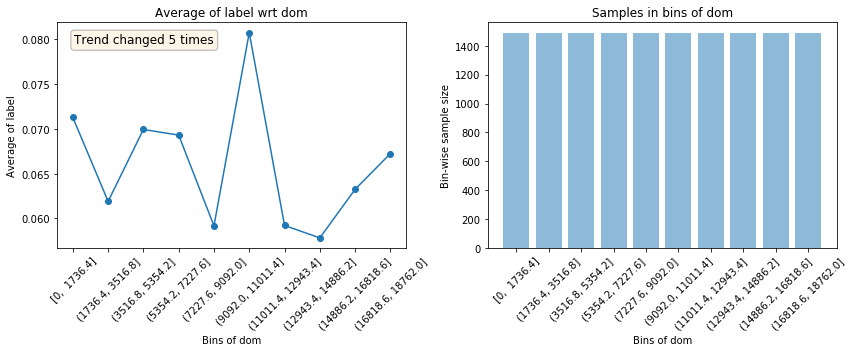

--------------------------------------------------------------------------------------------------------------


opscope is categorical. Categorical features not supported yet.
                                           Plots for empnum                                           


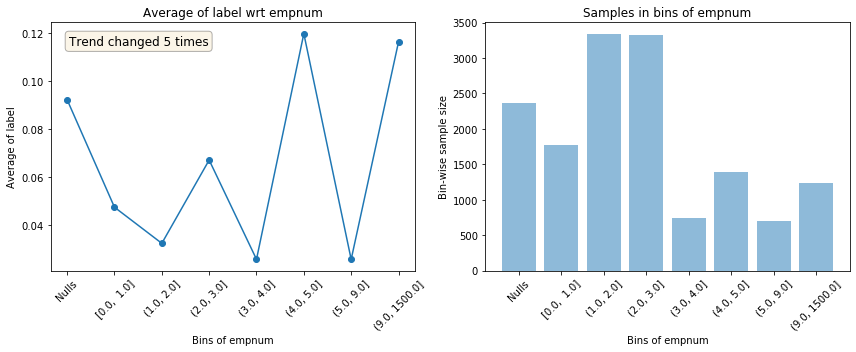

--------------------------------------------------------------------------------------------------------------


                                           Plots for parnum                                           


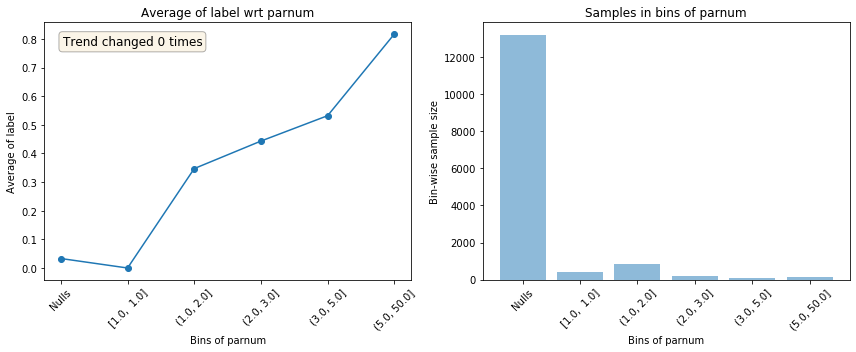

--------------------------------------------------------------------------------------------------------------


                                           Plots for exenum                                           


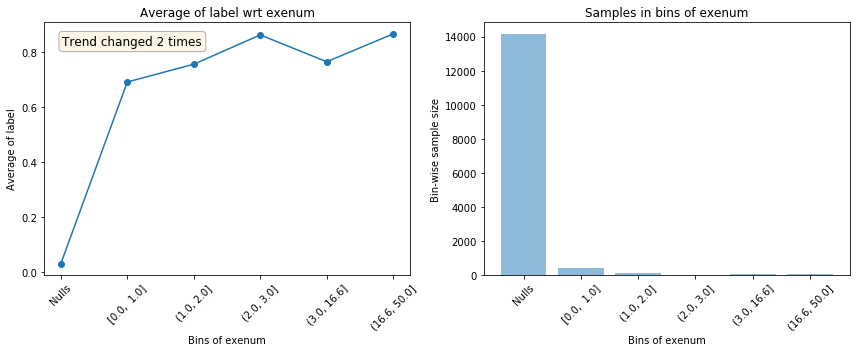

--------------------------------------------------------------------------------------------------------------


                                           Plots for regcap                                           


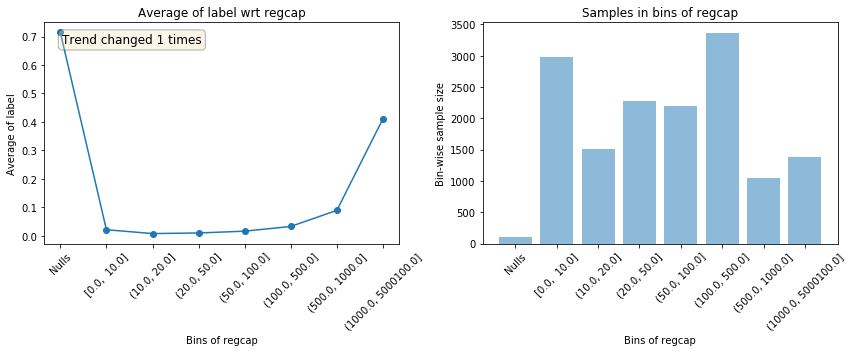

--------------------------------------------------------------------------------------------------------------


                                           Plots for reccap                                           


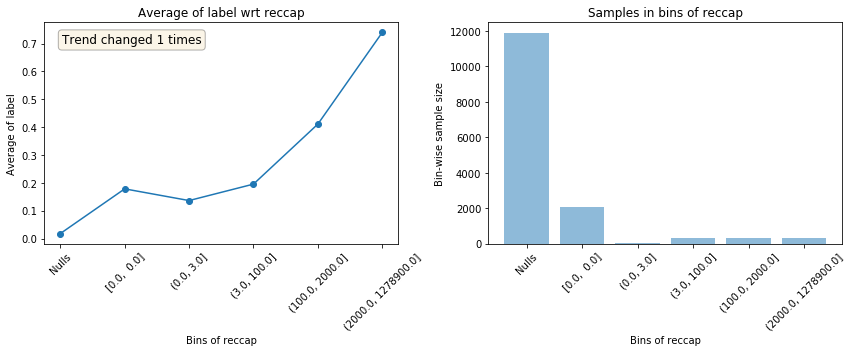

--------------------------------------------------------------------------------------------------------------


                                         Plots for forregcap                                          


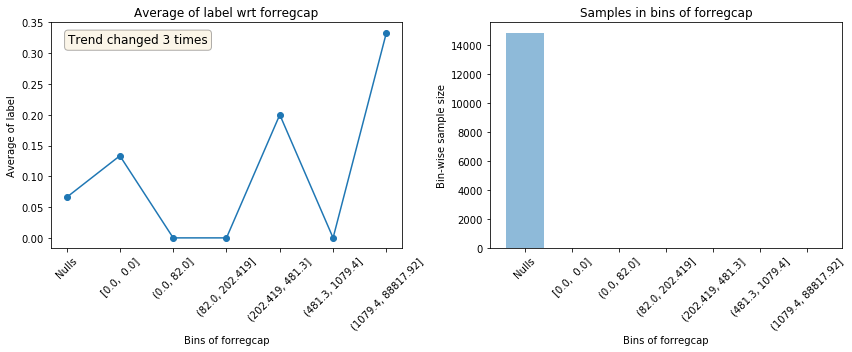

--------------------------------------------------------------------------------------------------------------


                                           Plots for congro                                           


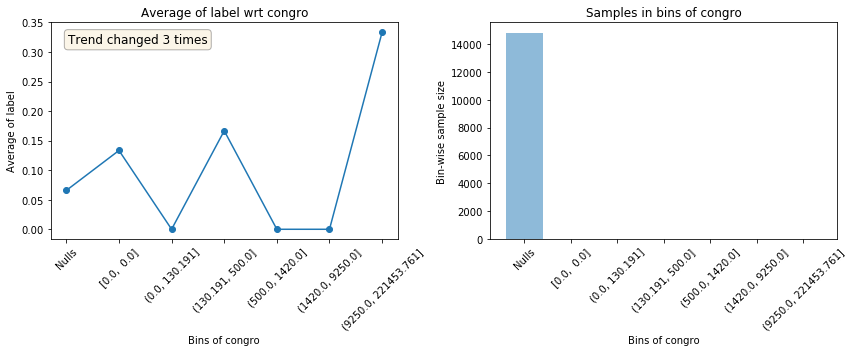

--------------------------------------------------------------------------------------------------------------


                                         Plots for person_SUM                                         


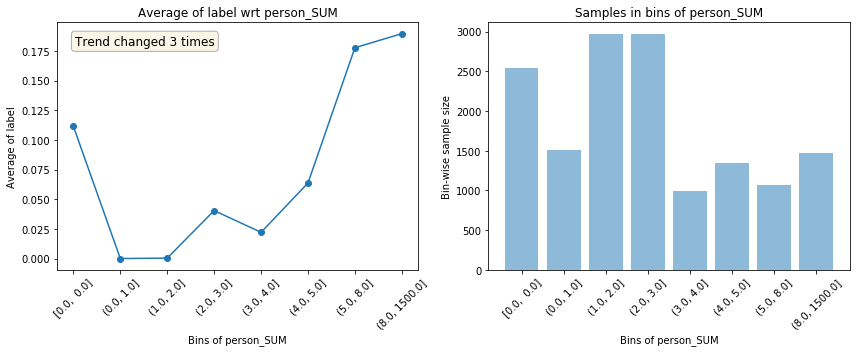

--------------------------------------------------------------------------------------------------------------


                                        Plots for opfrom_TONOW                                        


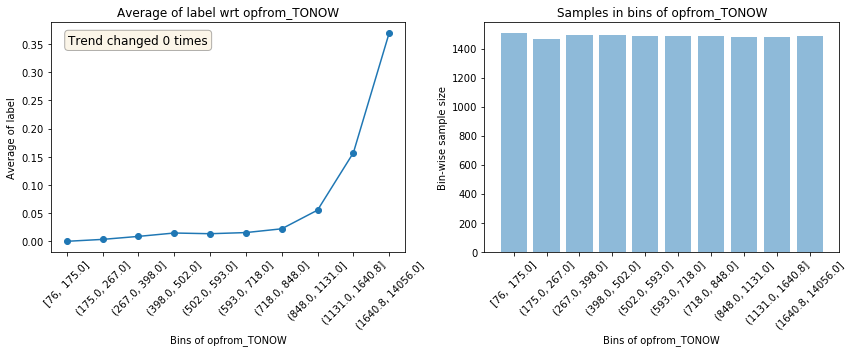

--------------------------------------------------------------------------------------------------------------


                                        Plots for opfrom_TIME                                         


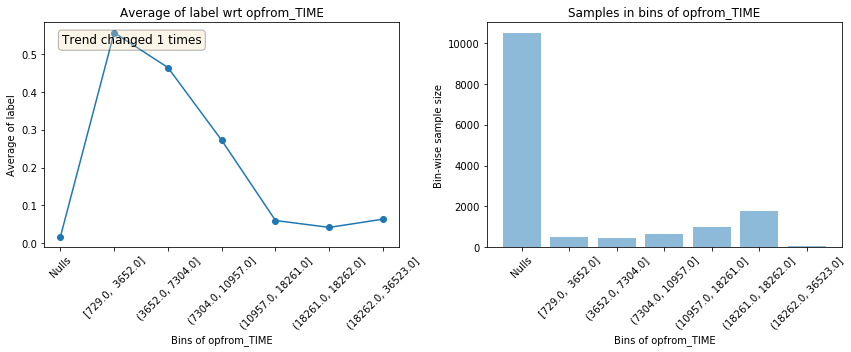

--------------------------------------------------------------------------------------------------------------


                                       Plots for opscope_COUNT                                        


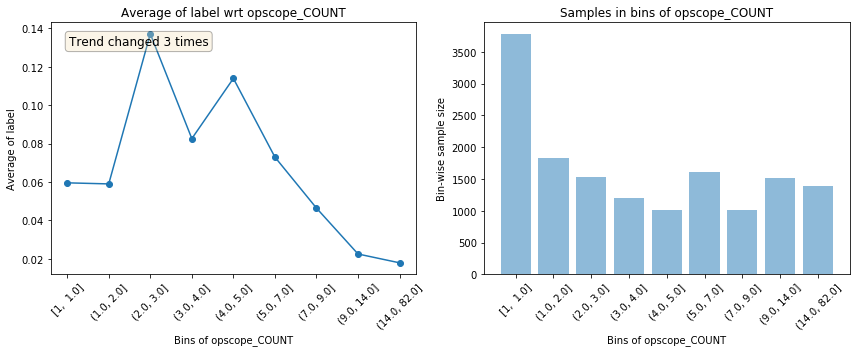

--------------------------------------------------------------------------------------------------------------


                                     Plots for legal_judgment_num                                     


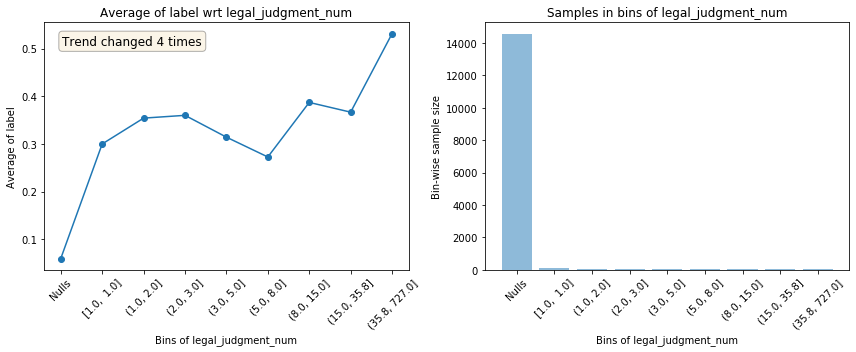

--------------------------------------------------------------------------------------------------------------


                                         Plots for brand_num                                          


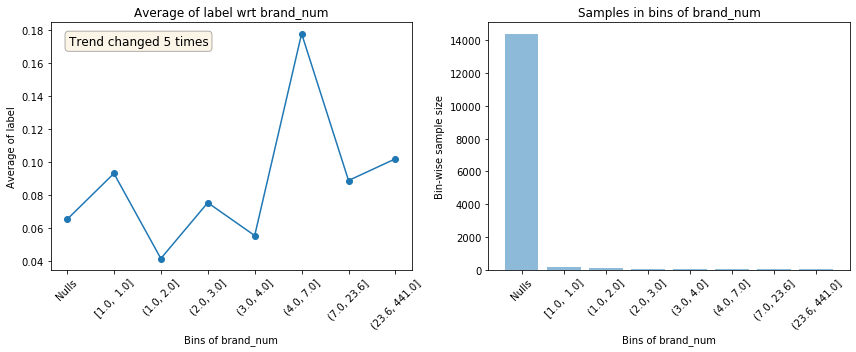

--------------------------------------------------------------------------------------------------------------


                                         Plots for patent_num                                         


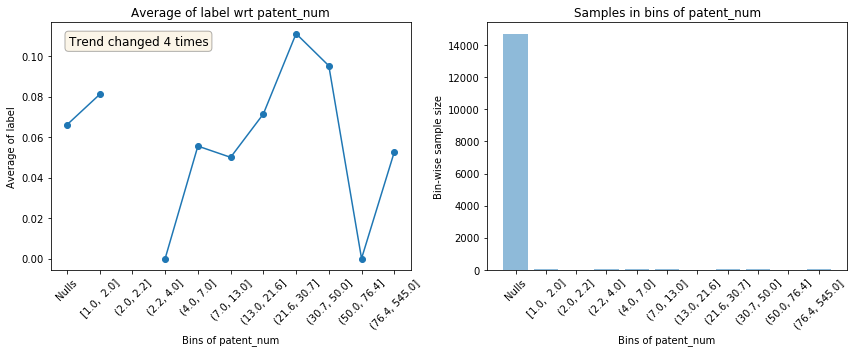

--------------------------------------------------------------------------------------------------------------


                                         Plots for other_SUM                                          


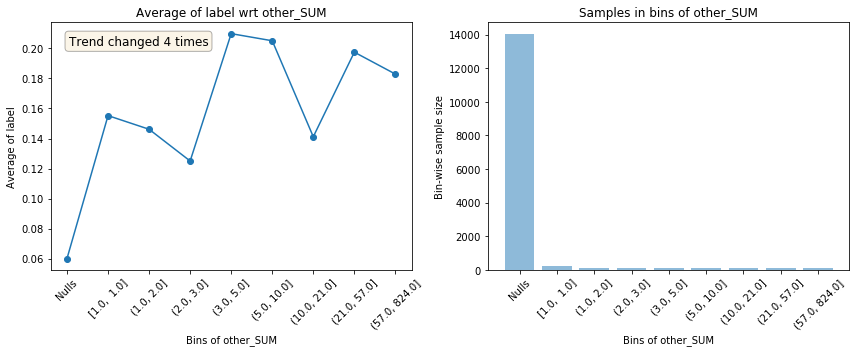

--------------------------------------------------------------------------------------------------------------


                                     Plots for public_date_COUNT                                      


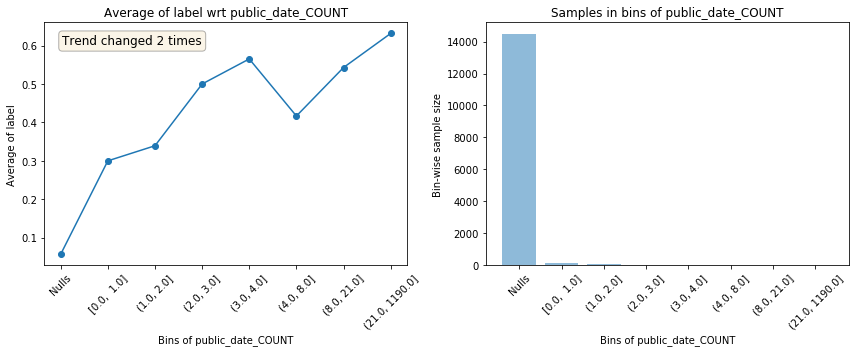

--------------------------------------------------------------------------------------------------------------


                                         Plots for public_MAX                                         


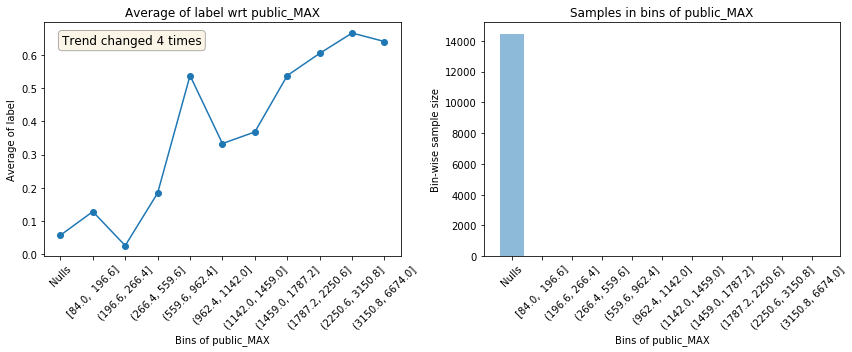

--------------------------------------------------------------------------------------------------------------


                                         Plots for public_MIN                                         


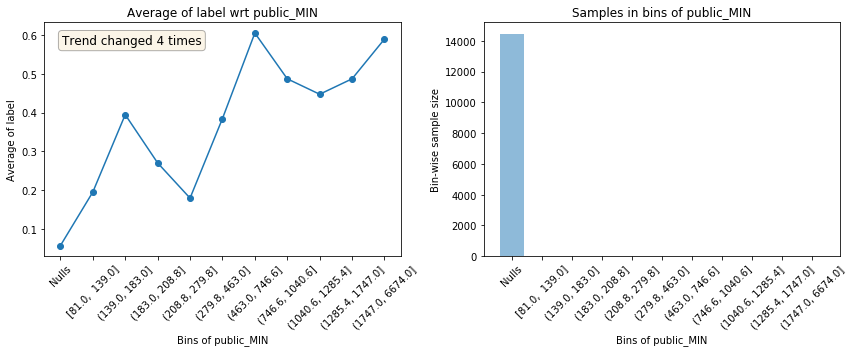

--------------------------------------------------------------------------------------------------------------


                                        Plots for public_MEAN                                         


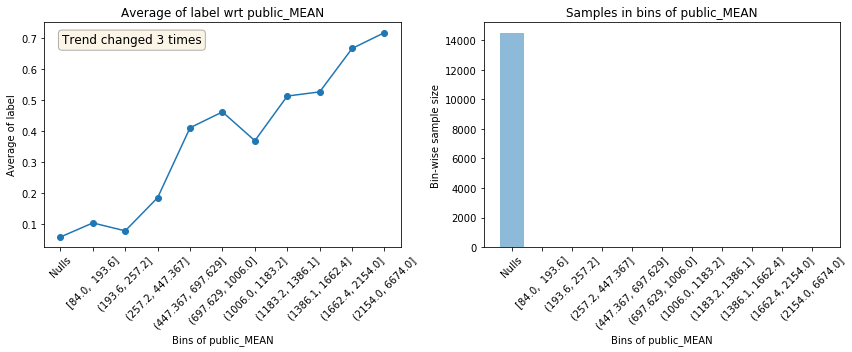

--------------------------------------------------------------------------------------------------------------


                                        Plots for news_COUNT1                                         


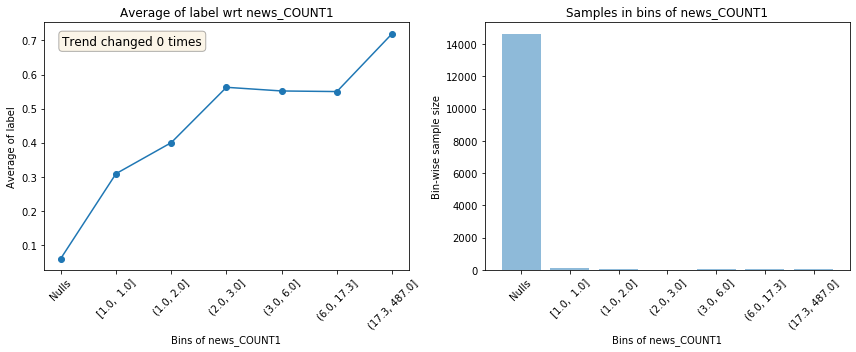

--------------------------------------------------------------------------------------------------------------


                                        Plots for news_COUNT2                                         


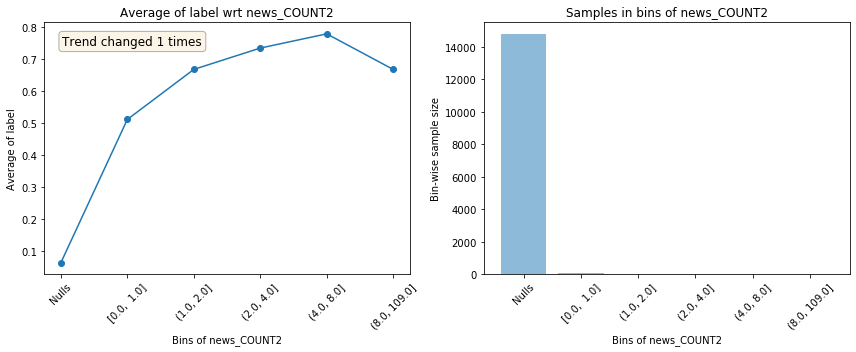

--------------------------------------------------------------------------------------------------------------


                                        Plots for news_COUNT3                                         


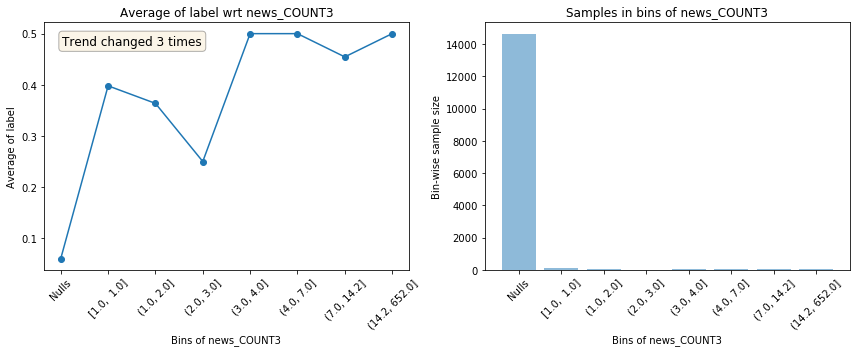

--------------------------------------------------------------------------------------------------------------


                                 Plots for PREV_TAX_CATEGORIES_COUNT                                  


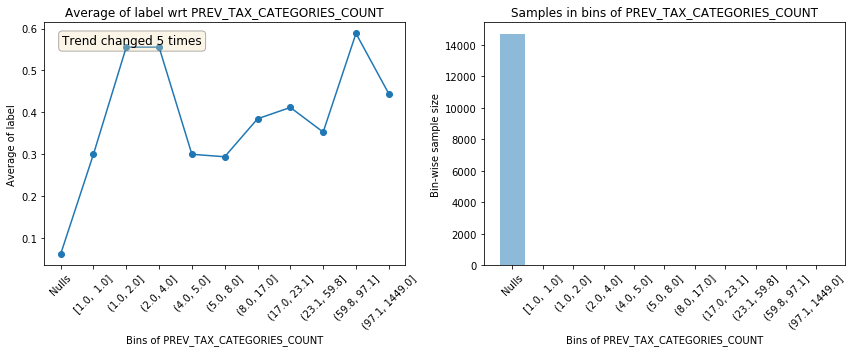

--------------------------------------------------------------------------------------------------------------


                                    Plots for PREV_TAX_ITEMS_COUNT                                    


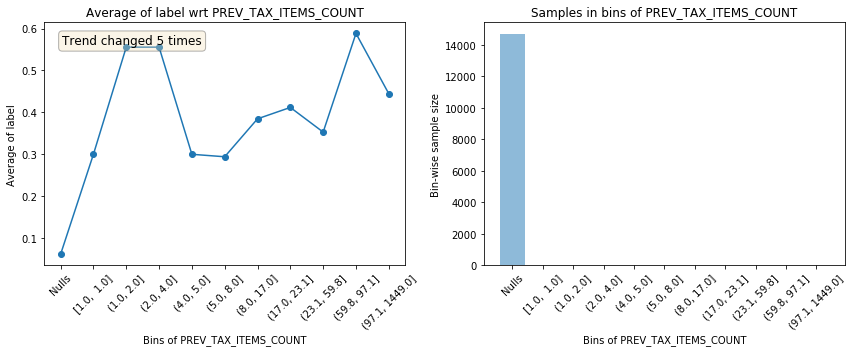

--------------------------------------------------------------------------------------------------------------


                                 Plots for PREV_TAXATION_BASIS_COUNT                                  


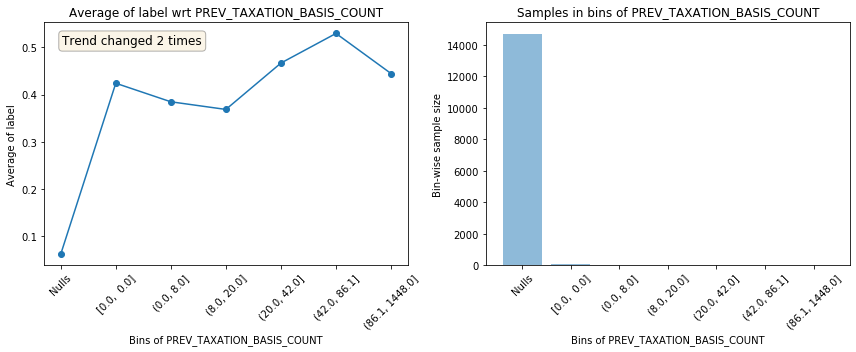

--------------------------------------------------------------------------------------------------------------


                                    Plots for PREV_TAX_AMOUNT_MAX                                     


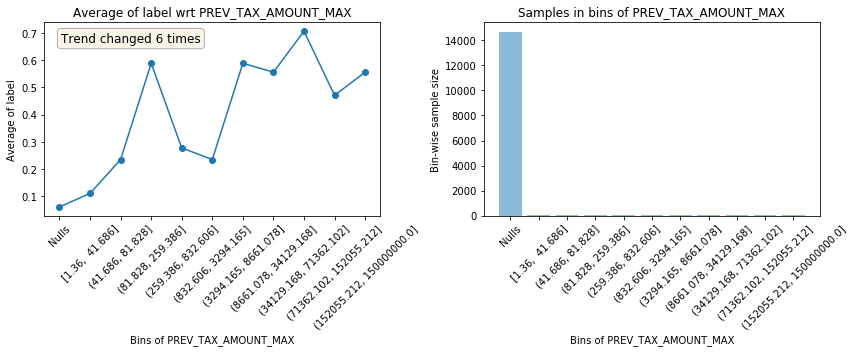

--------------------------------------------------------------------------------------------------------------


                                    Plots for PREV_TAX_AMOUNT_MIN                                     


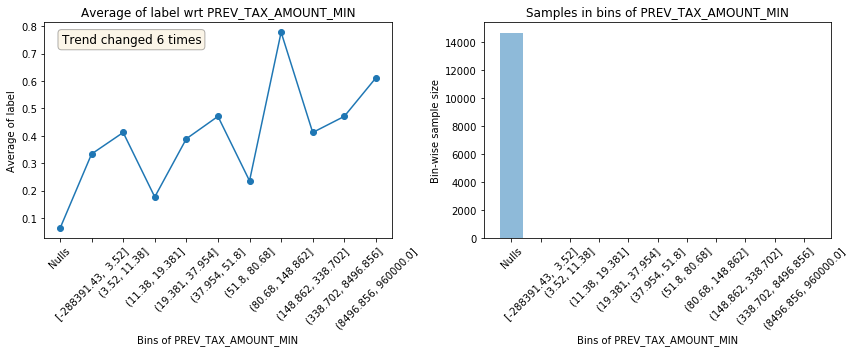

--------------------------------------------------------------------------------------------------------------


                                    Plots for PREV_TAX_AMOUNT_MEAN                                    


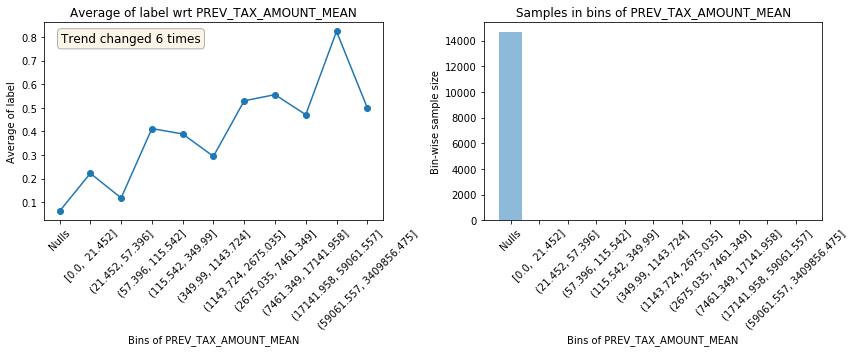

--------------------------------------------------------------------------------------------------------------


                                      Plots for PREV_FUNDAM_MAX                                       


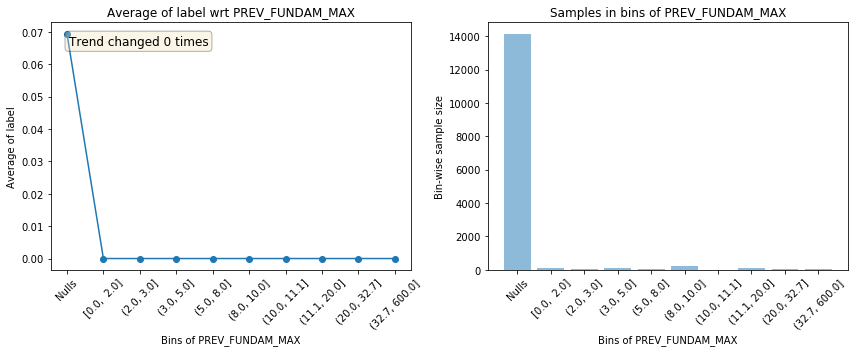

--------------------------------------------------------------------------------------------------------------


                                      Plots for PREV_EMPNUM_MAX                                       


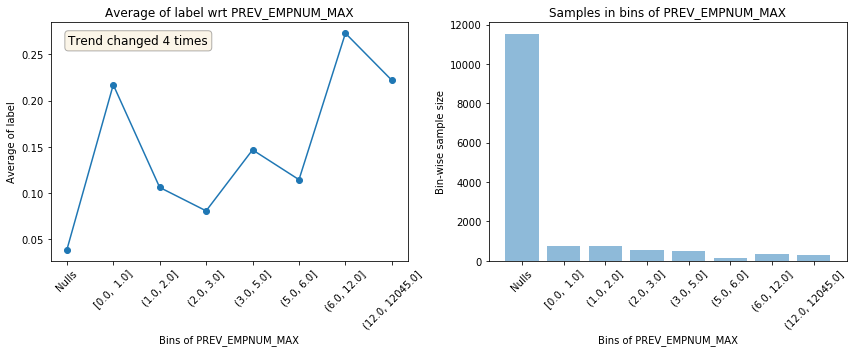

--------------------------------------------------------------------------------------------------------------


                                    Plots for PREV_UNEEMPLNUM_MAX                                     


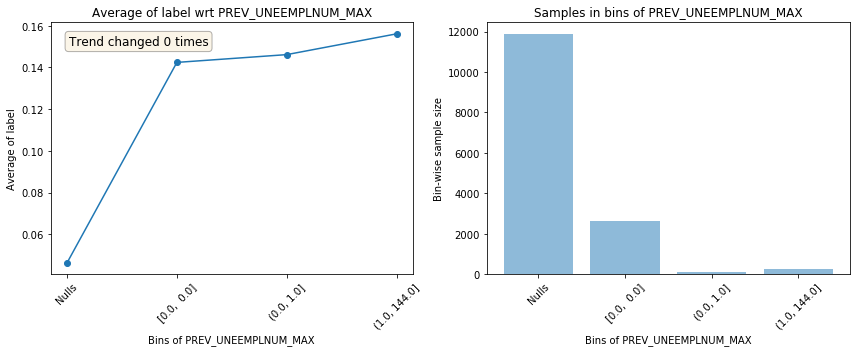

--------------------------------------------------------------------------------------------------------------


                                    Plots for PREV_UNEEMPLNUM_SUM                                     


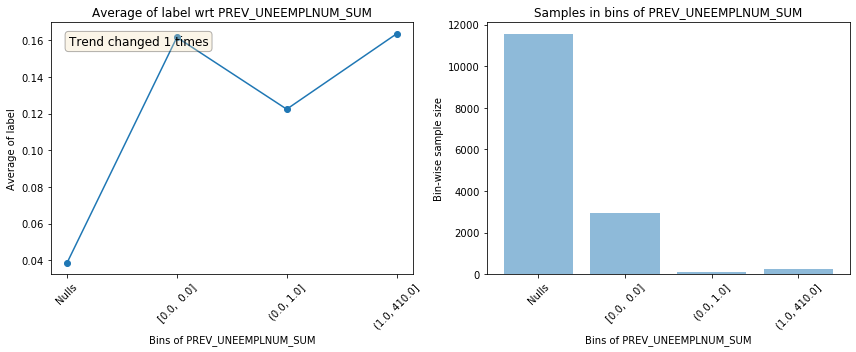

--------------------------------------------------------------------------------------------------------------


                                  Plots for changeinfo_bgxmdm_COUNT                                   


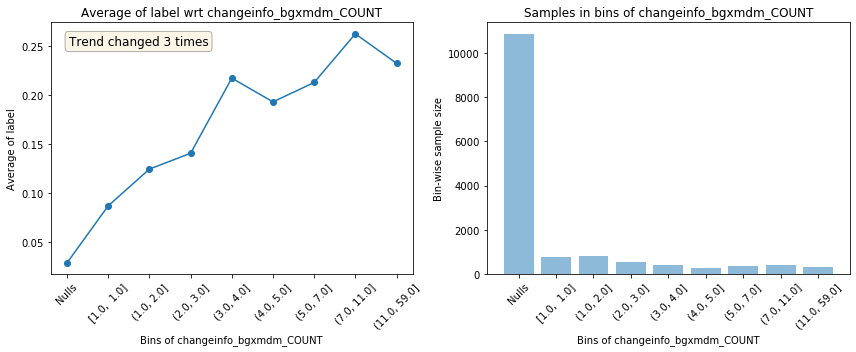

--------------------------------------------------------------------------------------------------------------


                                 Plots for changeinfo_bgxmdm_NUNIQUE                                  


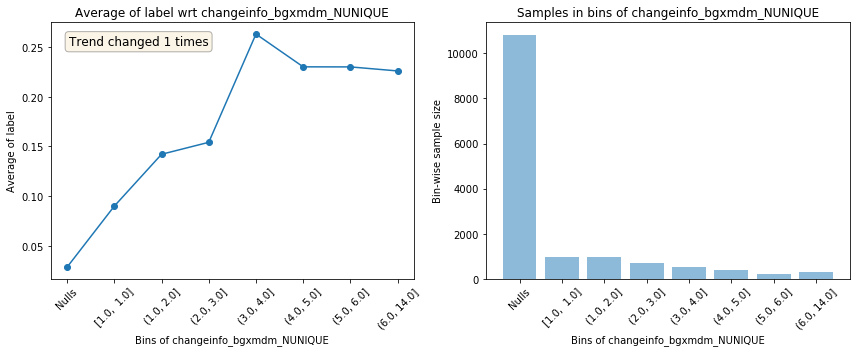

--------------------------------------------------------------------------------------------------------------


                                   Plots for changeinfo_bgq_NUNIQUE                                   


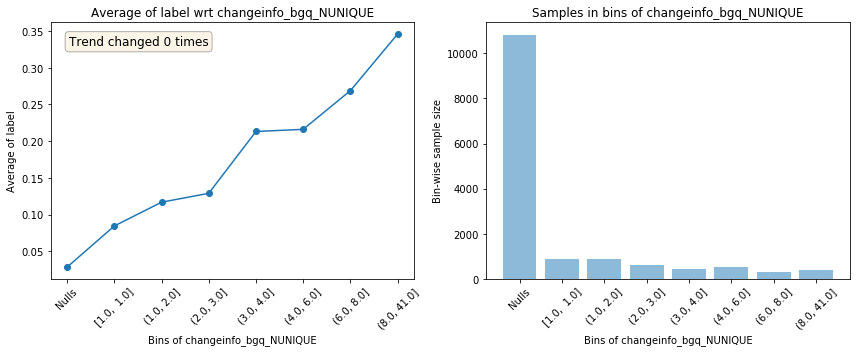

--------------------------------------------------------------------------------------------------------------


                                   Plots for changeinfo_bgh_NUNIQUE                                   


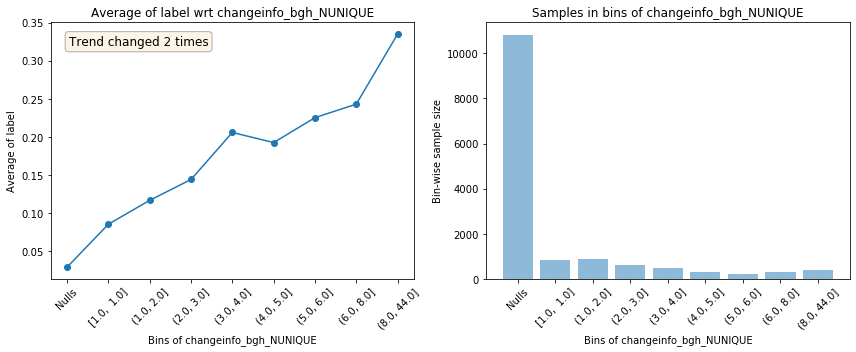

--------------------------------------------------------------------------------------------------------------


                                  Plots for changeinfo_bgrq_NUNIQUE                                   


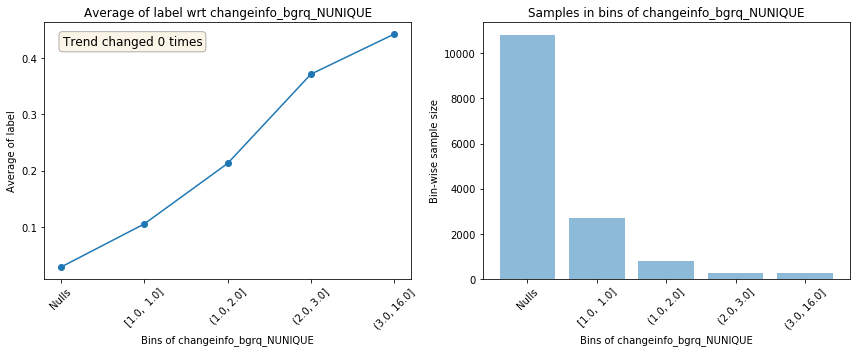

--------------------------------------------------------------------------------------------------------------




In [30]:
featexp.get_univariate_plots(train_data.drop(cat_col,axis=1),target_col='label')

In [44]:
std,df,train_value,value,name=corr('empnum',20,print_values=True)

0.0028784256807699387
train: [0.159, 0.1191, 0.2244, 0.2235, 0.0497, 0.0938, 0.0256, 0.0215, 0.0431, 0.0402]
label: [0.09225560727888278, 0.04743083003952569, 0.03237410071942446, 0.06710803490821547, 0.02571041948579161, 0.11979913916786226, 0.03674540682414698, 0.0125, 0.1546875, 0.07525083612040134]
test: [0.2887, 0.1637, 0.1342, 0.1961, 0.0474, 0.0665, 0.025, 0.0191, 0.035, 0.0243]


In [46]:
train_data = change(train_data,'empnum',20)
test_data = change(test_data,'empnum',20)

[5, 2, 0, 6, 8, 3, 1, 9, 4, 7]
14865
[3, 1, 7, 0, 2, 4, 5, 9, 8, 6]
10000


In [54]:
std,df,train_value,value,name=corr('parnum',8,print_values=True)

0.000519872932303578
train: [0.8877, 0.0268, 0.0566, 0.0131, 0.0044, 0.0115]
label: [0.033118605532398634, 0.0, 0.34720570749108204, 0.44329896907216493, 0.5692307692307692, 0.7543859649122807]
test: [0.9331, 0.0, 0.0389, 0.0099, 0.0031, 0.0146]


In [56]:
train_data = change(train_data,'parnum',8)
test_data = change(test_data,'parnum',8)

[0, 1, 3, 2, 5, 4]
14865
[0, 2, 5, 3, 4, '_']
10000


In [63]:
test_data[test_data.new_bin_parnum=='_']['parnum']

7163      0.0
7784    100.0
7975      0.0
9872      0.0
Name: parnum, dtype: float64

In [64]:
test_data.loc[7163,'new_bin_parnum']=0
test_data.loc[7975,'new_bin_parnum']=0
test_data.loc[9872,'new_bin_parnum']=0
test_data.loc[7784,'new_bin_parnum']=5

In [71]:
std,df,train_value,value,name=corr('exenum',2,print_values=True)

0.00011645816997557009
train: [0.9507, 0.0302, 0.0191]
label: [0.03141805830738749, 0.6904231625835189, 0.7992957746478874]
test: [0.9355, 0.0393, 0.0251]


In [73]:
train_data = change(train_data,'exenum',2)
test_data = change(test_data,'exenum',2)

[0, 1, 2]
14865
[0, 1, 2, '_']
10000


In [74]:
test_data[test_data.new_bin_exenum=='_']['exenum']

7784    100000.0
Name: exenum, dtype: float64

In [77]:
test_data.loc[7784,'new_bin_exenum']=0

In [80]:
std,df,train_value,value,name=corr('regcap',5,print_values=True)

0.0012058952209927467
train: [0.0071, 0.2004, 0.2551, 0.148, 0.2263, 0.1631]
label: [0.7142857142857143, 0.021483719368915744, 0.009229957805907173, 0.016363636363636365, 0.03299643281807372, 0.2721649484536082]
test: [0.0086, 0.2287, 0.2949, 0.1378, 0.158, 0.172]


In [82]:
train_data = change(train_data,'regcap',5)
test_data = change(test_data,'regcap',5)

[2, 3, 1, 4, 5, 0]
14865
[1, 2, 4, 3, 5, 0]
10000


In [95]:
std,df,train_value,value,name=corr('reccap',20,print_values=True)

0.006098043283769019
train: [0.7994, 0.1392, 0.0015, 0.014, 0.0063, 0.0096, 0.0104, 0.0096, 0.0101]
label: [0.01784061263990575, 0.17834702754954085, 0.13636363636363635, 0.1875, 0.2127659574468085, 0.32867132867132864, 0.487012987012987, 0.6549295774647887, 0.82]
test: [0.5898, 0.1572, 0.0034, 0.1008, 0.0426, 0.0465, 0.025, 0.0236, 0.0111]


In [97]:
dftrain_data = change(train_data,'reccap',20)
test_data = change(test_data,'reccap',20)

[0, 4, 5, 1, 3, 6, 7, 2, 8]
14865
[0, 1, 3, 5, 7, 4, 2, 6, 8]
10000


In [106]:
std,df,train_value,value,name=corr('forregcap',1,print_values=True)

0.00023918136252508687
train: [0.9962, 0.0038]
label: [0.0657752566180443, 0.12280701754385964]
test: [0.9807, 0.0193]


In [108]:
train_data = change(train_data,'forregcap',2)
test_data = change(test_data,'forregcap',2)

[0, 1, 2, '_']
14865
[0, 1, 2]
10000


In [109]:
train_data.loc[2173,'new_bin_forregcap']=2

In [116]:
std,df,train_value,value,name=corr('congro',1,print_values=True)

0.0002412666804480592
train: [0.9962, 0.0038]
label: [0.06577081504490513, 0.125]
test: [0.9807, 0.0193]


In [118]:
train_data = change(train_data,'congro',1)
test_data = change(test_data,'congro',1)

[0, 1, '_']
14865
[0, 1]
10000


In [119]:
train_data.loc[2173,'new_bin_congro']=1

In [122]:
std,df,train_value,value,name=corr('person_SUM',5,print_values=True)

0.008321342320246044
train: [0.2725, 0.1997, 0.1996, 0.1578, 0.1705]
label: [0.07010614663046161, 0.00033692722371967657, 0.04044489383215369, 0.04605543710021322, 0.18468823993685873]
test: [0.4493, 0.1173, 0.1852, 0.1089, 0.1392]


In [124]:
train_data = change(train_data,'person_SUM',5)
test_data = change(test_data,'person_SUM',5)

[3, 2, 1, 0, 4]
14865
[2, 0, 4, 1, 3, '_']
10000


In [125]:
test_data.loc[7784,'new_bin_person_SUM']=0

In [126]:
train_data.drop(cat_col,axis=1).columns

Index(['id', 'dom', 'opscope', 'empnum', 'parnum', 'exenum', 'regcap',
       'reccap', 'forregcap', 'congro', 'person_SUM', 'opfrom_TONOW',
       'opfrom_TIME', 'opscope_COUNT', 'label', 'legal_judgment_num',
       'brand_num', 'patent_num', 'other_SUM', 'public_date_COUNT',
       'public_MAX', 'public_MIN', 'public_MEAN', 'news_COUNT1', 'news_COUNT2',
       'news_COUNT3', 'PREV_TAX_CATEGORIES_COUNT', 'PREV_TAX_ITEMS_COUNT',
       'PREV_TAXATION_BASIS_COUNT', 'PREV_TAX_AMOUNT_MAX',
       'PREV_TAX_AMOUNT_MIN', 'PREV_TAX_AMOUNT_MEAN', 'PREV_FUNDAM_MAX',
       'PREV_EMPNUM_MAX', 'PREV_UNEEMPLNUM_MAX', 'PREV_UNEEMPLNUM_SUM',
       'changeinfo_bgxmdm_COUNT', 'changeinfo_bgxmdm_NUNIQUE',
       'changeinfo_bgq_NUNIQUE', 'changeinfo_bgh_NUNIQUE',
       'changeinfo_bgrq_NUNIQUE', 'new_bin_empnum', 'new_bin_parnum',
       'new_bin_exenum', 'new_bin_regcap', 'new_bin_reccap',
       'new_bin_forregcap', 'new_bin_congro', 'new_bin_person_SUM'],
      dtype='object')

In [128]:
std,df,train_value,value,name=corr('opfrom_TONOW',10,print_values=True)
df

0.027065613305116264
train: [0.1012, 0.0988, 0.1003, 0.1004, 0.0998, 0.0998, 0.1, 0.0997, 0.0998, 0.1]
label: [0.0, 0.0034036759700476512, 0.008718980549966466, 0.014735432016075016, 0.013477088948787063, 0.01549865229110512, 0.02219233355749832, 0.0553306342780027, 0.15711395819285232, 0.3698722259583053]
test: [0.001, 0.0018, 0.0033, 0.0258, 0.0079, 0.0095, 0.0153, 0.1436, 0.2625, 0.529]


,opfrom_TONOW,Samples_in_bin,label_mean,opfrom_TONOW_mean
0,"[76, 175.0]",1505,0.000000,123.685714
1,"(175.0, 267.0]",1469,0.003404,219.428863
2,"(267.0, 398.0]",1491,0.008719,354.432596
3,"(398.0, 502.0]",1493,0.014735,453.651708
4,"(502.0, 593.0]",1484,0.013477,546.836927
5,"(593.0, 718.0]",1484,0.015499,647.243935
6,"(718.0, 848.0]",1487,0.022192,780.841964
7,"(848.0, 1131.0]",1482,0.055331,969.671390
8,"(1131.0, 1640.8]",1483,0.157114,1350.028321
9,"(1640.8, 14056.0]",1487,0.369872,2728.119032


In [129]:
train_data = change(train_data,'opfrom_TONOW',10)
test_data = change(test_data,'opfrom_TONOW',10)

[4, 0, 9, 7, 1, 5, 6, 2, 8, 3]
14865
[8, 3, 9, 7, 6, 4, 5, 1, 0, 2, '_']
10000


In [131]:
test_data.loc[5683,'new_bin_opfrom_TONOW']=9
test_data.loc[6159,'new_bin_opfrom_TONOW']=9
test_data.loc[9550,'new_bin_opfrom_TONOW']=9

In [132]:
std,df,train_value,value,name=corr('opfrom_TIME',10,print_values=True)
df

0.004230806670909522
train: [0.7051, 0.0347, 0.0309, 0.042, 0.0659, 0.1183, 0.0032]
label: [0.016696880068695734, 0.5562015503875969, 0.46405228758169936, 0.272, 0.0602655771195097, 0.04209328782707622, 0.06382978723404255]
test: [0.5559, 0.081, 0.0729, 0.0865, 0.0985, 0.0982, 0.0061]


,opfrom_TIME,Samples_in_bin,label_mean,opfrom_TIME_mean
0,Nulls,10481,0.016697,NaN
1,"[729.0, 3652.0]",516,0.556202,3059.556202
2,"(3652.0, 7304.0]",459,0.464052,7033.723312
3,"(7304.0, 10957.0]",625,0.272000,10729.275200
4,"(10957.0, 18261.0]",979,0.060266,17984.962206
5,"(18261.0, 18262.0]",1758,0.042093,18262.000000
6,"(18262.0, 36523.0]",47,0.063830,20551.085106


In [133]:
train_data = change(train_data,'opfrom_TIME',10)
test_data = change(test_data,'opfrom_TIME',10)

[0, 4, 5, 3, 1, 2, 6]
14865
[0, 5, 3, 4, 2, 1, 6, '_']
10000


In [134]:
test_data.loc[5282,'new_bin_opfrom_TIME']=1
test_data.loc[5463,'new_bin_opfrom_TIME']=1
test_data.loc[5934,'new_bin_opfrom_TIME']=1
test_data.loc[6039,'new_bin_opfrom_TIME']=1
test_data.loc[6980,'new_bin_opfrom_TIME']=1
test_data.loc[8412,'new_bin_opfrom_TIME']=1
test_data.loc[9372,'new_bin_opfrom_TIME']=1
test_data.loc[9495,'new_bin_opfrom_TIME']=1
test_data.loc[9962,'new_bin_opfrom_TIME']=1

In [139]:
std,df,train_value,value,name=corr('opscope_COUNT',10,print_values=True)
df

0.00161490952812333
train: [0.254, 0.123, 0.1035, 0.0806, 0.0679, 0.1078, 0.0681, 0.1014, 0.0937]
label: [0.059602649006622516, 0.0590486604702023, 0.13719115734720416, 0.08263772954924875, 0.11397423191278494, 0.07298814722395508, 0.046442687747035576, 0.022546419098143235, 0.017946877243359655]
test: [0.3389, 0.1668, 0.118, 0.0811, 0.0619, 0.0796, 0.0466, 0.0606, 0.0465]


,opscope_COUNT,Samples_in_bin,label_mean,opscope_COUNT_mean
0,"[1, 1.0]",3775,0.059603,1.000000
1,"(1.0, 2.0]",1829,0.059049,2.000000
2,"(2.0, 3.0]",1538,0.137191,3.000000
3,"(3.0, 4.0]",1198,0.082638,4.000000
4,"(4.0, 5.0]",1009,0.113974,5.000000
5,"(5.0, 7.0]",1603,0.072988,6.463506
6,"(7.0, 9.0]",1012,0.046443,8.458498
7,"(9.0, 14.0]",1508,0.022546,11.736074
8,"(14.0, 82.0]",1393,0.017947,22.002872


In [140]:
train_data = change(train_data,'opscope_COUNT',10)
test_data = change(test_data,'opscope_COUNT',10)

[3, 4, 1, 0, 5, 7, 6, 8, 2]
14865
[0, 1, 4, 2, 7, 6, 5, 3, 8]
10000


In [147]:
std,df,train_value,value,name=corr('legal_judgment_num',2,print_values=True)

0.0011619436640762113
train: [0.9789, 0.011, 0.0101]
label: [0.0598543155579989, 0.32515337423312884, 0.38]
test: [0.9309, 0.0387, 0.0303]


In [149]:
train_data = change(train_data,'legal_judgment_num',2)
test_data = change(test_data,'legal_judgment_num',2)

[0, 1, 2]
14865
[0, 2, 1, '_']
10000


In [150]:
test_data.loc[7388,'new_bin_legal_judgment_num']=2

In [159]:
std,df,train_value,value,name=corr('brand_num',4,print_values=True)

2.3802932853354845e-05
train: [0.9674, 0.0108, 0.0065, 0.008, 0.0073]
label: [0.0652990264255911, 0.09316770186335403, 0.041666666666666664, 0.08403361344537816, 0.11926605504587157]
test: [0.9578, 0.015, 0.0084, 0.0094, 0.0094]


In [161]:
train_data = change(train_data,'brand_num',4)
test_data = change(test_data,'brand_num',4)

[0, 1, 2, 3, 4]
14865
[0, 3, 1, 2, 4]
10000


In [164]:
std,df,train_value,value,name=corr('patent_num',3,print_values=True)

2.7672595488559676e-05
train: [0.9878, 0.0042, 0.0039, 0.0041]
label: [0.0660627937070081, 0.047619047619047616, 0.06896551724137931, 0.06557377049180328]
test: [0.9788, 0.0056, 0.0068, 0.0086]


In [166]:
train_data = change(train_data,'patent_num',3)
test_data = change(test_data,'patent_num',3)

[0, 2, 3, 1]
14865
[0, 3, 2, 1, '_']
10000


In [167]:
test_data.loc[3838,'new_bin_patent_num']=3
test_data.loc[7107,'new_bin_patent_num']=3

In [172]:
std,df,train_value,value,name=corr('other_SUM',3,print_values=True)

0.0007982759510996985
train: [0.9438, 0.0235, 0.0145, 0.0183]
label: [0.06001853303870554, 0.1518624641833811, 0.17674418604651163, 0.17647058823529413]
test: [0.8948, 0.0417, 0.0291, 0.0341]


In [174]:
train_data = change(train_data,'other_SUM',3)
test_data = change(test_data,'other_SUM',3)

[0, 1, 2, 3]
14865
[0, 2, 1, 3, '_']
10000


In [175]:
test_data.loc[3838,'new_bin_other_SUM']=3
test_data.loc[7107,'new_bin_other_SUM']=3
test_data.loc[7388,'new_bin_other_SUM']=3

In [180]:
std,df,train_value,value,name=corr('public_date_COUNT',2,print_values=True)

0.00038670019674170997
train: [0.9739, 0.0152, 0.0109]
label: [0.056986944809007394, 0.30973451327433627, 0.5308641975308642]
test: [0.9461, 0.0298, 0.0241]


In [182]:
train_data = change(train_data,'public_date_COUNT',2)
test_data = change(test_data,'public_date_COUNT',2)

[0, 2, 1]
14865
[0, 1, 2]
10000


In [186]:
std,df,train_value,value,name=corr('public_MAX',3,print_values=True)
df

0.0002843439157411647
train: [0.974, 0.0087, 0.0087, 0.0087]
label: [0.05698300870285951, 0.15503875968992248, 0.4263565891472868, 0.627906976744186]
test: [0.9461, 0.01, 0.0201, 0.0238]


,public_MAX,Samples_in_bin,label_mean,public_MAX_mean
0,Nulls,14478,0.056983,NaN
1,"[84.0, 657.0]",129,0.155039,285.503876
2,"(657.0, 1638.333]",129,0.426357,1175.868217
3,"(1638.333, 6674.0]",129,0.627907,2713.635659


In [187]:
train_data = change(train_data,'public_MAX',3)
test_data = change(test_data,'public_MAX',3)

[0, 3, 2, 1]
14865
[0, 2, 3, 1]
10000


In [190]:
std,df,train_value,value,name=corr('public_MIN',3,print_values=True)

0.0002700508135587129
train: [0.974, 0.0087, 0.0086, 0.0087]
label: [0.05698300870285951, 0.2692307692307692, 0.4296875, 0.5116279069767442]
test: [0.9461, 0.0134, 0.0177, 0.0228]


In [192]:
train_data = change(train_data,'public_MIN',3)
test_data = change(test_data,'public_MIN',3)

[0, 2, 3, 1]
14865
[0, 3, 2, 1]
10000


In [193]:
std,df,train_value,value,name=corr('public_MEAN',3,print_values=True)

0.00028200391574116466
train: [0.974, 0.0087, 0.0087, 0.0087]
label: [0.05698300870285951, 0.12403100775193798, 0.46511627906976744, 0.6201550387596899]
test: [0.9461, 0.0102, 0.0208, 0.0229]


In [195]:
train_data = change(train_data,'public_MEAN',3)
test_data = change(test_data,'public_MEAN',3)

[0, 2, 3, 1]
14865
[0, 3, 2, 1]
10000


In [200]:
std,df,train_value,value,name=corr('news_COUNT1',2,print_values=True)

0.00016855102900051162
train: [0.9833, 0.0106, 0.0061]
label: [0.059861804747896284, 0.3291139240506329, 0.6]
test: [0.9653, 0.0227, 0.012]


In [202]:
train_data = change(train_data,'news_COUNT1',2)
test_data = change(test_data,'news_COUNT1',2)

[0, 2, 1]
14865
[0, 1, 2]
10000


In [205]:
std,df,train_value,value,name=corr('news_COUNT2',1,print_values=True)

5.4384795606925095e-05
train: [0.9935, 0.0065]
label: [0.06243228602383532, 0.6082474226804123]
test: [0.9861, 0.0139]


In [207]:
train_data = change(train_data,'news_COUNT2',1)
test_data = change(test_data,'news_COUNT2',1)

[0, 1]
14865
[0, 1]
10000


In [212]:
std,df,train_value,value,name=corr('news_COUNT3',1,print_values=True)

0.0003152290961845308
train: [0.9839, 0.0161]
label: [0.060307692307692305, 0.4125]
test: [0.9661, 0.0339]


In [214]:
train_data = change(train_data,'news_COUNT3',1)
test_data = change(test_data,'news_COUNT3',1)

[0, 1]
14865
[0, 1]
10000


In [219]:
std,df,train_value,value,name=corr('PREV_TAX_CATEGORIES_COUNT',1,print_values=True)

0.002667172566443094
train: [0.9883, 0.0117]
label: [0.061670410455380846, 0.43103448275862066]
test: [0.9366, 0.0633]


In [221]:
train_data = change(train_data,'PREV_TAX_CATEGORIES_COUNT',1)
test_data = change(test_data,'PREV_TAX_CATEGORIES_COUNT',1)

[0, 1]
14865
[0, 1, '_']
10000


In [222]:
test_data.loc[3954,'new_bin_PREV_TAX_CATEGORIES_COUNT']=1

In [225]:
std,df,train_value,value,name=corr('PREV_TAX_ITEMS_COUNT',2,print_values=True)

0.0013386592828467387
train: [0.9883, 0.0062, 0.0055]
label: [0.061670410455380846, 0.42391304347826086, 0.43902439024390244]
test: [0.9366, 0.0345, 0.0288]


In [227]:
train_data = change(train_data,'PREV_TAX_ITEMS_COUNT',2)
test_data = change(test_data,'PREV_TAX_ITEMS_COUNT',2)

[0, 2, 1]
14865
[0, 2, 1, '_']
10000


In [228]:
test_data.loc[3954,'new_bin_PREV_TAX_ITEMS_COUNT']=2

In [231]:
std,df,train_value,value,name=corr('PREV_TAXATION_BASIS_COUNT',2,print_values=True)

0.001335132004003819
train: [0.9883, 0.0062, 0.0055]
label: [0.061670410455380846, 0.42391304347826086, 0.43902439024390244]
test: [0.9366, 0.033, 0.0303]


In [233]:
train_data = change(train_data,'PREV_TAXATION_BASIS_COUNT',2)
test_data = change(test_data,'PREV_TAXATION_BASIS_COUNT',2)

[0, 1, 2]
14865
[0, 2, 1, '_']
10000


In [234]:
test_data.loc[3954,'new_bin_PREV_TAXATION_BASIS_COUNT']=2

In [237]:
std,df,train_value,value,name=corr('PREV_TAX_AMOUNT_MAX',2,print_values=True)

0.0014663890506282074
train: [0.9883, 0.0059, 0.0059]
label: [0.061670410455380846, 0.28735632183908044, 0.5747126436781609]
test: [0.9366, 0.0458, 0.0173]


In [239]:
train_data = change(train_data,'PREV_TAX_AMOUNT_MAX',2)
test_data = change(test_data,'PREV_TAX_AMOUNT_MAX',2)

[0, 2, 1]
14865
[0, 1, 2, '_']
10000


In [240]:
test_data.loc[7408,'new_bin_PREV_TAX_AMOUNT_MAX']=1
test_data.loc[8145,'new_bin_PREV_TAX_AMOUNT_MAX']=1
test_data.loc[9145,'new_bin_PREV_TAX_AMOUNT_MAX']=1

In [243]:
std,df,train_value,value,name=corr('PREV_TAX_AMOUNT_MIN',2,print_values=True)

0.0013372486940859938
train: [0.9883, 0.0059, 0.0059]
label: [0.061670410455380846, 0.3563218390804598, 0.5057471264367817]
test: [0.9366, 0.0337, 0.0296]


In [245]:
train_data = change(train_data,'PREV_TAX_AMOUNT_MIN',2)
test_data = change(test_data,'PREV_TAX_AMOUNT_MIN',2)

[0, 1, 2]
14865
[0, 1, 2, '_']
10000


In [246]:
test_data.loc[3954,'new_bin_PREV_TAX_AMOUNT_MIN']=1

In [249]:
std,df,train_value,value,name=corr('PREV_TAX_AMOUNT_MEAN',2,print_values=True)

0.001513295182481554
train: [0.9883, 0.0059, 0.0059]
label: [0.061670410455380846, 0.28735632183908044, 0.5747126436781609]
test: [0.9366, 0.048, 0.0154]


In [251]:
train_data = change(train_data,'PREV_TAX_AMOUNT_MEAN',2)
test_data = change(test_data,'PREV_TAX_AMOUNT_MEAN',2)

[0, 2, 1]
14865
[0, 1, 2]
10000


In [258]:
std,df,train_value,value,name=corr('PREV_FUNDAM_MAX',1,print_values=True)

0.021272250043092182
train: [0.9499, 0.0501]
label: [0.06947100063734862, 0.0]
test: [0.8037, 0.1955]


In [260]:
train_data = change(train_data,'PREV_FUNDAM_MAX',1)
test_data = change(test_data,'PREV_FUNDAM_MAX',1)

[0, 1]
14865
[1, 0, '_']
10000


In [261]:
test_data.loc[422,'new_bin_PREV_FUNDAM_MAX']=1
test_data.loc[2349,'new_bin_PREV_FUNDAM_MAX']=1
test_data.loc[3564,'new_bin_PREV_FUNDAM_MAX']=1
test_data.loc[3702,'new_bin_PREV_FUNDAM_MAX']=1
test_data.loc[6473,'new_bin_PREV_FUNDAM_MAX']=1
test_data.loc[7149,'new_bin_PREV_FUNDAM_MAX']=1
test_data.loc[7965,'new_bin_PREV_FUNDAM_MAX']=1
test_data.loc[9086,'new_bin_PREV_FUNDAM_MAX']=1

In [264]:
std,df,train_value,value,name=corr('PREV_EMPNUM_MAX',5,print_values=True)

0.022849693124167136
train: [0.7758, 0.0505, 0.0494, 0.0375, 0.0437, 0.0431]
label: [0.03858827610128338, 0.2170439414114514, 0.10612244897959183, 0.0807899461400359, 0.14021571648690292, 0.24804992199687986]
test: [0.4401, 0.0984, 0.1146, 0.0866, 0.1161, 0.1442]


In [266]:
train_data = change(train_data,'PREV_EMPNUM_MAX',5)
test_data = change(test_data,'PREV_EMPNUM_MAX',5)

[0, 4, 5, 1, 2, 3]
14865
[5, 0, 1, 3, 4, 2]
10000


In [271]:
std,df,train_value,value,name=corr('PREV_UNEEMPLNUM_MAX',5,print_values=True)

0.052765363501448746
train: [0.7977, 0.1776, 0.0247]
label: [0.04629785798616967, 0.14242424242424243, 0.15258855585831063]
test: [0.4831, 0.4053, 0.1111]


In [273]:
train_data = change(train_data,'PREV_UNEEMPLNUM_MAX',5)
test_data = change(test_data,'PREV_UNEEMPLNUM_MAX',5)

[0, 1, 2]
14865
[1, 0, 2, '_']
10000


In [274]:
test_data.loc[101,'new_bin_PREV_UNEEMPLNUM_MAX']=2
test_data.loc[545,'new_bin_PREV_UNEEMPLNUM_MAX']=2
test_data.loc[3835,'new_bin_PREV_UNEEMPLNUM_MAX']=2
test_data.loc[9035,'new_bin_PREV_UNEEMPLNUM_MAX']=2
test_data.loc[9170,'new_bin_PREV_UNEEMPLNUM_MAX']=2

In [277]:
std,df,train_value,value,name=corr('PREV_UNEEMPLNUM_SUM',20,print_values=True)

0.03550626339302245
train: [0.7756, 0.1997, 0.0066, 0.0081, 0.01]
label: [0.03859831728684188, 0.16167059616032334, 0.12244897959183673, 0.18181818181818182, 0.14864864864864866]
test: [0.4399, 0.4485, 0.0233, 0.0321, 0.0559]


In [279]:
train_data = change(train_data,'PREV_UNEEMPLNUM_SUM',20)
test_data = change(test_data,'PREV_UNEEMPLNUM_SUM',20)

[0, 1, 4, 3, 2]
14865
[1, 0, 3, 2, 4, '_']
10000


In [280]:
test_data.loc[545,'new_bin_PREV_UNEEMPLNUM_SUM']=4
test_data.loc[3835,'new_bin_PREV_UNEEMPLNUM_SUM']=4
test_data.loc[9170,'new_bin_PREV_UNEEMPLNUM_SUM']=4

In [283]:
std,df,train_value,value,name=corr('changeinfo_bgxmdm_COUNT',3,print_values=True)

0.013201026763654599
train: [0.7287, 0.1073, 0.0867, 0.0773]
label: [0.02852658788774003, 0.10595611285266458, 0.17843289371605897, 0.23759791122715404]
test: [0.5307, 0.1619, 0.1447, 0.1625]


In [285]:
train_data = change(train_data,'changeinfo_bgxmdm_COUNT',3)
test_data = change(test_data,'changeinfo_bgxmdm_COUNT',3)

[0, 2, 1, 3]
14865
[1, 0, 2, 3, '_']
10000


In [286]:
test_data.loc[3526,'new_bin_changeinfo_bgxmdm_COUNT']=3
test_data.loc[6831,'new_bin_changeinfo_bgxmdm_COUNT']=3

In [287]:
std,df,train_value,value,name=corr('changeinfo_bgxmdm_NUNIQUE',5,print_values=True)

0.007950755994947543
train: [0.7287, 0.0636, 0.0663, 0.0467, 0.0599, 0.0348]
label: [0.02852658788774003, 0.08994708994708994, 0.14213197969543148, 0.15417867435158503, 0.24915824915824916, 0.2277992277992278]
test: [0.5307, 0.1016, 0.0922, 0.0751, 0.1133, 0.0871]


In [289]:
train_data = change(train_data,'changeinfo_bgxmdm_NUNIQUE',5)
test_data = change(test_data,'changeinfo_bgxmdm_NUNIQUE',5)

[0, 3, 2, 1, 4, 5]
14865
[2, 0, 3, 1, 5, 4]
10000


In [290]:
std,df,train_value,value,name=corr('changeinfo_bgq_NUNIQUE',5,print_values=True)

0.008164227402098203
train: [0.7287, 0.0605, 0.0604, 0.0723, 0.0342, 0.0439]
label: [0.02852658788774003, 0.08453837597330367, 0.11692650334075724, 0.16465116279069766, 0.21611001964636542, 0.3128834355828221]
test: [0.5307, 0.0929, 0.0769, 0.1124, 0.067, 0.1199]


In [292]:
train_data = change(train_data,'changeinfo_bgq_NUNIQUE',5)
test_data = change(test_data,'changeinfo_bgq_NUNIQUE',5)

[0, 2, 3, 1, 4, 5]
14865
[2, 0, 3, 1, 5, 4, '_']
10000


In [293]:
test_data.loc[4099,'new_bin_changeinfo_bgq_NUNIQUE']=5
test_data.loc[7674,'new_bin_changeinfo_bgq_NUNIQUE']=5

In [294]:
std,df,train_value,value,name=corr('changeinfo_bgh_NUNIQUE',5,print_values=True)

0.008162477636076035
train: [0.7287, 0.057, 0.0595, 0.0727, 0.0365, 0.0455]
label: [0.02852658788774003, 0.08500590318772137, 0.11638418079096045, 0.1702127659574468, 0.20626151012891344, 0.2968980797636632]
test: [0.5307, 0.0913, 0.0773, 0.1111, 0.0673, 0.1221]


In [296]:
train_data = change(train_data,'changeinfo_bgh_NUNIQUE',5)
test_data = change(test_data,'changeinfo_bgh_NUNIQUE',5)

[0, 2, 3, 1, 4, 5]
14865
[2, 0, 3, 1, 5, 4, '_']
10000


In [297]:
test_data.loc[4099,'new_bin_changeinfo_bgh_NUNIQUE']=5
test_data.loc[7674,'new_bin_changeinfo_bgh_NUNIQUE']=5

In [298]:
std,df,train_value,value,name=corr('changeinfo_bgrq_NUNIQUE',5,print_values=True)

0.013814327656058077
train: [0.7287, 0.181, 0.0544, 0.0359]
label: [0.02852658788774003, 0.10516536603493125, 0.2126081582200247, 0.4071294559099437]
test: [0.5307, 0.2138, 0.111, 0.1444]


In [300]:
train_data = change(train_data,'changeinfo_bgrq_NUNIQUE',5)
test_data = change(test_data,'changeinfo_bgrq_NUNIQUE',5)

[0, 1, 2, 3]
14865
[1, 0, 2, 3, '_']
10000


In [301]:
test_data.loc[7674,'new_bin_changeinfo_bgrq_NUNIQUE']=5

In [305]:
train_data.to_csv(r'train_bin.csv',index=False,encoding='gbk')
test_data.to_csv(r'test_bin.csv',index=False,encoding='gbk')